## Santiago Guerrero Elias Giovanni

## 01/09/2022

# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

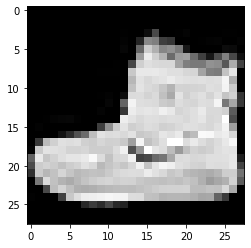

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

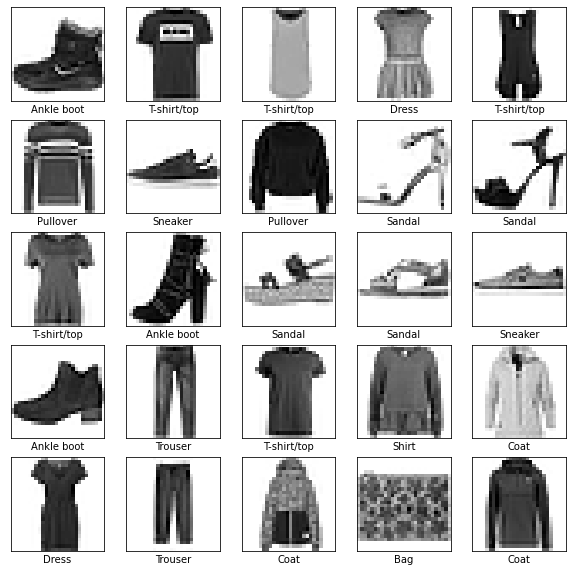

In [ ]:
plt.figure(figsize = (10, 10))
for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(training_images [i], cmap = "binary")
    plt.xlabel(label_names[training_labels[i]])
plt.show()

Habras notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
training_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

## Previo a la revisión, es importante destacar que:

### En el siguiente bloque se declara el modelo de entrenamiento de redes neuronales, este mismo modelo llamado "model" se puede llamar en bloques siguientes, pero se decide hacer modelos individuales con el fin de practicar la sintáxis de la librería de Keras, se tiene presente que se está trabajando doble por lo mencionado anteriormente, esto es una decisión personal. 
### Los modelos no afectan el rendimiento del código, pero si lo hace un poco mas extenso.

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

X = training_images
y = training_labels
 
    #Modelado de red neuronal
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                         keras.layers.Dense(128, activation = "sigmoid"),
                         keras.layers.Dense(50, activation = "relu"),
                         keras.layers.Dense(10, activation = "softmax")])
 
     #Resultados de loss y accuracy
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
 
    #Resumen de la configuracion de nuestra red neuronal
model.summary()

    #epoch 
model.fit(X, y, epochs = 10, batch_size = 64)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 50)                6450      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 107,440
Trainable params: 107,440
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
938/938 [==============================] - 2s 1ms/step - loss: 0.5839 - accuracy: 0.8007
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.3985 -

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [ ]:
loss_t , accuracy_t = model.evaluate(test_images, test_labels, verbose = 2)

print("Evaluación de modelo", accuracy_t)

313/313 - 0s - loss: 0.3320 - accuracy: 0.8809 - 310ms/epoch - 991us/step
Evaluación de modelo 0.8809000253677368


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos: 

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones. 

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números, 
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [ ]:
classifications = model.predict(test_images)
classifications[0]


array([4.5726515e-06, 2.0464754e-06, 9.4101433e-06, 2.4636865e-05, 1.1516092e-06, 9.4477935e-03, 1.5173217e-04, 2.0048631e-02, 2.5748321e-05, 9.7028422e-01], dtype=float32)

Tu respuesta a la pregunta 3.1 aquí:

#### Es una representación numérica del nivel de exactitud o precisión al "catalogar los datos", estos valores no los podemoss interpretar, por ello se puede usar la función de numpy "argmax", que transforma los valores y nos da el valor más alto de los números que arroja la predicción haciendo que nos de el número de etiqueta a la cual pertenece. 

Tu respuesta a la pregunta 3.2 aquí:

#### Complementando la respuesta anterior, el valor que nos da es 9 o la etiqueta "Ankle boot".


In [ ]:
#En el siguiente bloque de código se ejecuta las respuestas para comprobar.

In [ ]:
print("Primera entradade classifications: ", np.argmax(classifications[0]))
print("Etiqueta: ", label_names[9])

Primera entradade classifications:  9
Etiqueta:  Ankle boot


# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [ ]:


model_2 = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(512, activation = "sigmoid"),
                           keras.layers.Dense(250, activation = "relu"),
                           keras.layers.Dense(90, activation = "softmax")])

model_2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_2.fit(X, y, epochs = 10, batch_size = 64)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5466 - accuracy: 0.8063
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3927 - accuracy: 0.8563
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3509 - accuracy: 0.8710
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3213 - accuracy: 0.8813
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3020 - accuracy: 0.8879
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2823 - accuracy: 0.8948
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2682 - accuracy: 0.8994
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2539 - accuracy: 0.9046
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2408 - accuracy: 0.9094
Epoch 10/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2285 - accuracy: 0.9134

In [ ]:
model_3 = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(1024, activation = "sigmoid"),
                           keras.layers.Dense(512, activation = "relu"),
                           keras.layers.Dense(261, activation = "softmax")])
model_3.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_3.fit(X, y, epochs = 10, batch_size = 64)

Epoch 1/10
938/938 [==============================] - 10s 10ms/step - loss: 0.5475 - accuracy: 0.8030
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3920 - accuracy: 0.8583
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3497 - accuracy: 0.8727
Epoch 4/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3213 - accuracy: 0.8807
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2945 - accuracy: 0.8908
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2756 - accuracy: 0.8963
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2625 - accuracy: 0.9006
Epoch 8/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2469 - accuracy: 0.9073
Epoch 9/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2314 - accuracy: 0.9124
Epoch 10/10
938/938 [==============================] - 10s 11ms/step - loss: 0.219

Tu respuesta a la pregunta 4.3 aquí:

#### La red neuronal entrena los datos para obtener una clasificación de las imagenes con respecto a las etiquetas dadas, el número de neuronas y capas que se le declaren, puede ayudar o no a obtener mejores resultados, es decir, al declarar más neuronas y capas ocultas, no necesariamente obtendremos un mejor rendimiento, por las funciones de activación nos pueden dar mejores resultados.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**: 

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**: 

* ¿Porque crees que ha ocurrido esto?

In [ ]:
classifications = model_2.predict(test_images)
classifications[0]

array([1.3723943e-06, 5.0214197e-07, 4.0355342e-08, 2.5541604e-07, 6.7846216e-08, 4.0428227e-04, 9.7631164e-07, 3.3681051e-04, 4.0529264e-09, 9.9925560e-01, 2.5204421e-14, 1.3950088e-14,
       9.3326564e-15, 9.1704242e-15, 1.7264476e-14, 2.9650751e-14, 1.2949797e-14, 4.0107742e-14, 8.9095682e-14, 2.5938612e-14, 1.5750879e-14, 2.9119651e-14, 9.1791429e-14, 2.3756616e-14,
       2.1472959e-14, 2.9441788e-14, 4.6566280e-14, 2.4808740e-14, 3.8323670e-14, 3.6278584e-14, 1.1650400e-14, 4.3373261e-14, 2.6883447e-14, 3.3215370e-14, 1.5876957e-14, 1.0189497e-13,
       2.1861507e-14, 4.0609013e-14, 9.0401387e-15, 4.2533536e-14, 4.0324670e-14, 2.4182240e-14, 4.5792255e-14, 5.1022046e-14, 1.0973886e-14, 3.8332296e-14, 4.4736767e-14, 4.1671582e-14,
       2.8081014e-14, 1.7794853e-14, 6.4987898e-14, 9.4212276e-14, 6.2436533e-14, 6.5329171e-14, 2.4219169e-14, 1.2642723e-14, 3.8283199e-14, 5.5297143e-14, 3.1060088e-14, 2.5213748e-14,
       6.0582317e-14, 3.6723036e-14, 4.0882106e-14, 5.3708394e-14

In [ ]:
print("Primera entradade classifications: ", np.argmax(classifications[0]))
print("Etiqueta: ", label_names[9])

Primera entradade classifications:  9
Etiqueta:  Ankle boot


Tu respuesta a la pregunta 5.1 aquí:

#### Ankle boot

Tu respuesta a la pregunta 5.2 aquí:

#### Genera una clasificación en base a los datos de entrenamiento y busca una mayor semejanza con los demás datos, encontrando dicha coicidencia con la etiqueta "Ankle boot"

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [ ]:
model_3 = keras.Sequential([keras.layers.Dense(128, activation = "sigmoid"),
                         keras.layers.Dense(50, activation = "relu"),
                         keras.layers.Dense(10, activation = "softmax")])

model_3.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_3.fit(X, y, epochs = 10, batch_size = 64)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Giovanni\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Giovanni\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Giovanni\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Giovanni\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Giovanni\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Giovanni\AppData\Local\Temp/ipykernel_7052/3599823103.py", line 6, in <module>
      model_3.fit(X, y, epochs = 10, batch_size = 64)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Giovanni\anaconda3\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [1792,10] and labels shape [64]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_119033]

Tu respuesta a la pregunta 6 aquí:

#### La capa Flatten nos ayuda a convertir datos que estan expresados en 2 o mas dimensiones, en datos unidimensionales

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10? 

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [ ]:
model_4 = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(128, activation = "sigmoid"),
                           keras.layers.Dense(50, activation = "relu"),
                           keras.layers.Dense(5, activation = "softmax")])
model_4.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_4.fit(X, y, epochs = 10, batch_size = 64)

Tu respuestas a la pregunta 7.1 aquí:

#### Es el valor mínimo para que se pueda generar el entrenamiento del modelo, ya que se tienen 10 etiquetas de la base de datos.

Tu respuestas a la pregunta 7.2 aquí:

#### Mientras sea una cantidad mayor a 10, no existe ningún problema, pero si son menos de 10 nos arrojára un error por lo explicado en la pregunta anterior.

# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [ ]:
model_5 = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(128, activation = "sigmoid"),
                           keras.layers.Dense(50, activation = "relu"),
                           keras.layers.Dense(10, activation = "softmax")])
model_5.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_5.fit(X, y, epochs = 15, batch_size = 64)

Epoch 1/15
938/938 [==============================] - 2s 1ms/step - loss: 0.5715 - accuracy: 0.8024
Epoch 2/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3942 - accuracy: 0.8572
Epoch 3/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3583 - accuracy: 0.8698
Epoch 4/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.8786
Epoch 5/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3157 - accuracy: 0.8855
Epoch 6/15
938/938 [==============================] - 1s 1ms/step - loss: 0.3016 - accuracy: 0.8895
Epoch 7/15
938/938 [==============================] - 1s 1ms/step - loss: 0.2897 - accuracy: 0.8933
Epoch 8/15
938/938 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.8954
Epoch 9/15
938/938 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.9003
Epoch 10/15
938/938 [==============================] - 1s 1ms/step - loss: 0.2595 - accuracy: 0.9037

In [ ]:
model_6 = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                           keras.layers.Dense(128, activation = "sigmoid"),
                           keras.layers.Dense(50, activation = "relu"),
                           keras.layers.Dense(10, activation = "softmax")])
model_6.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model_6.fit(X, y, epochs = 30, batch_size = 64)

Epoch 1/30
938/938 [==============================] - 1s 1ms/step - loss: 0.5676 - accuracy: 0.8055
Epoch 2/30
938/938 [==============================] - 1s 1ms/step - loss: 0.3955 - accuracy: 0.8571
Epoch 3/30
938/938 [==============================] - 1s 1ms/step - loss: 0.3639 - accuracy: 0.8674
Epoch 4/30
938/938 [==============================] - 1s 1ms/step - loss: 0.3365 - accuracy: 0.8778
Epoch 5/30
938/938 [==============================] - 1s 1ms/step - loss: 0.3201 - accuracy: 0.8830
Epoch 6/30
938/938 [==============================] - 1s 1ms/step - loss: 0.3046 - accuracy: 0.8893
Epoch 7/30
938/938 [==============================] - 1s 1ms/step - loss: 0.2907 - accuracy: 0.8923
Epoch 8/30
938/938 [==============================] - 1s 1ms/step - loss: 0.2791 - accuracy: 0.8971
Epoch 9/30
938/938 [==============================] - 1s 1ms/step - loss: 0.2695 - accuracy: 0.8992
Epoch 10/30
938/938 [==============================] - 1s 1ms/step - loss: 0.2581 - accuracy: 0.9030

Tu respuesta a la pregunta 8.3 aquí:

#### El "learning rate decay" es un parámetro que nos ayuda a que el "learning rate" vaya siendo menor, conforme el número de epoch va aumentando, se optimiza el aprendizaje y permite que "loss" vaya disminuyendo conforme se acerca a una posible solución.



# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [ ]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.40):
              print("\nAlcanzado el 40% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
            
callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])